In [1]:
# Passo 1 : Importando bibliotecas

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

data = pd.read_excel(r'C:\Users\USER\Desktop\TCC\Dados-TCC.xlsx')  # colocar onde esta a planilha no seu computador

In [2]:
#Passo 2: Importando e Limpandando dados
 
display(data)
data.info()
# Verficando os números nulos da base
data.isnull().sum()
# Tratando valores vazios
data[data.isnull().any(axis=1)]
# Excluindo colunas que não tinham informações
data = data.dropna()
data.isnull().sum()



,Preço do Terreno (R$),Preço do Metro Quadrado (R$/m²),Bairro,CEP,De Frente para Praia,Logística de Pessoas,Logística de Veículos,Tipo de Solo
0,1200000,6000,Copacabana,22020-010,Sim,Alta,Alta,Arenoso
1,1000000,5000,Ipanema,22420-040,Sim,Alta,Média,Argiloso
2,1500000,7500,Leblon,22441-010,Sim,Média,Alta,Silte
3,800000,4000,Botafogo,22290-070,Não,Alta,Média,Argiloso
4,1400000,7000,Barra da Tijuca,22793-081,Sim,Alta,Alta,Arenoso
...,...,...,...,...,...,...,...,...
551,280000,1400,Colégio,21645-280,Não,Média,Média,Argiloso
552,380000,1900,Santo Cristo,20220-450,Não,Média,Média,Argiloso
553,360000,1800,Vaz Lobo,21350-380,Não,Média,Média,Argiloso
554,300000,1500,Tomás Coelho,20780-220,Não,Média,Média,Argiloso


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Preço do Terreno (R$)            556 non-null    int64 
 1   Preço do Metro Quadrado (R$/m²)  556 non-null    int64 
 2   Bairro                           554 non-null    object
 3   CEP                              555 non-null    object
 4   De Frente para Praia             554 non-null    object
 5   Logística de Pessoas             554 non-null    object
 6   Logística de Veículos            555 non-null    object
 7   Tipo de Solo                     554 non-null    object
dtypes: int64(2), object(6)
memory usage: 34.9+ KB


Preço do Terreno (R$)              0
Preço do Metro Quadrado (R$/m²)    0
Bairro                             0
CEP                                0
De Frente para Praia               0
Logística de Pessoas               0
Logística de Veículos              0
Tipo de Solo                       0
dtype: int64

In [3]:
# Informações estatísticas

# Configurando para exibir os números com 2 casas decimais
pd.set_option('display.float_format', '{:.2f}'.format)

# Selecionando apenas as colunas desejadas
colunas_estatistica = ['Preço do Terreno (R$)', 'Preço do Metro Quadrado (R$/m²)', 'Bairro']

# Exibindo as informações estatísticas dessas 3 colunas
print(data[colunas_estatistica].describe())


       Preço do Terreno (R$)  Preço do Metro Quadrado (R$/m²)
count                 549.00                           549.00
mean               797358.83                          3986.79
std                665147.30                          3325.74
min                240000.00                          1200.00
25%                380000.00                          1900.00
50%                510000.00                          2550.00
75%               1050000.00                          5250.00
max               5000000.00                         25000.00


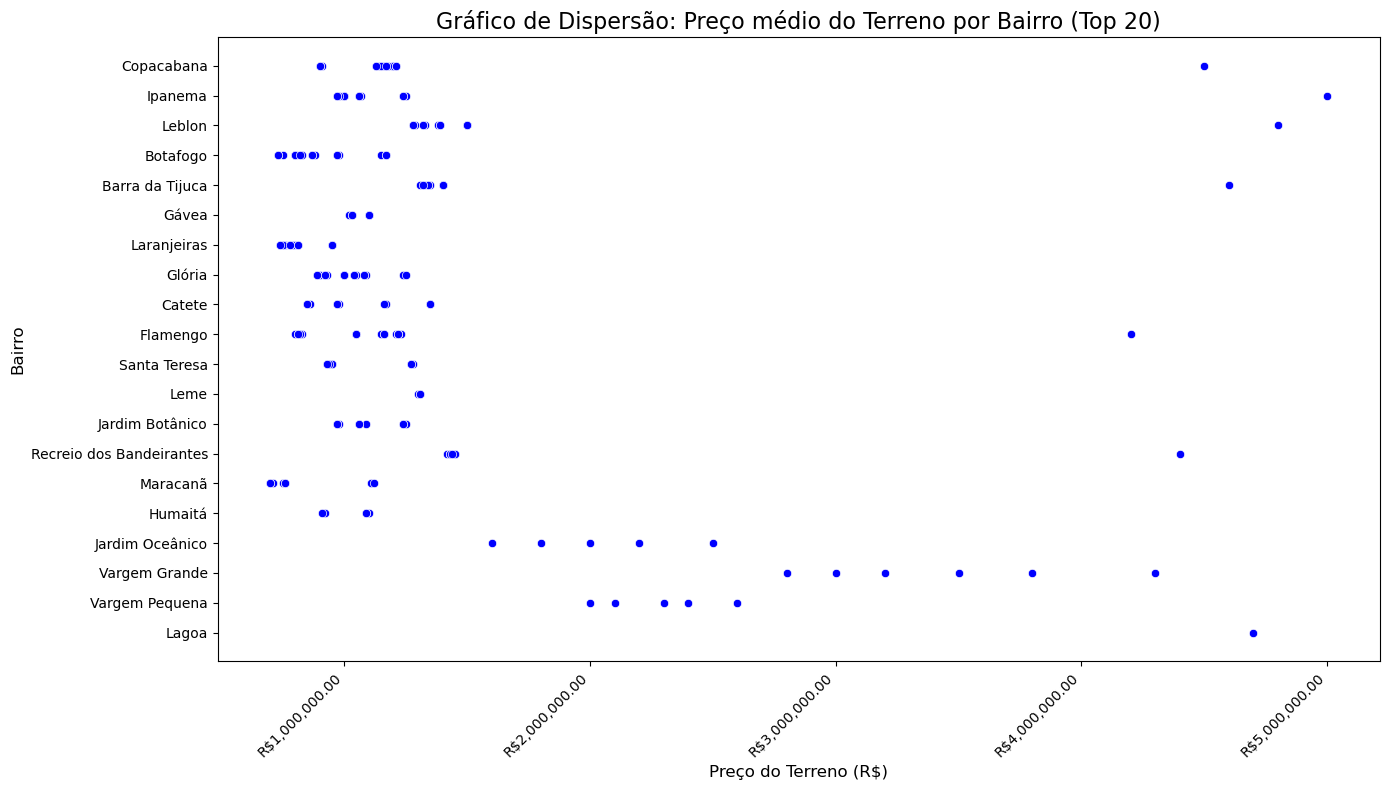

In [4]:
# gráfico de disperção 

# Configurando o tamanho da figura para dar mais espaço
plt.figure(figsize=(14, 8))

# Selecionando os 20 bairros com maior preço médio de terreno
top_20_bairros = data.groupby('Bairro')['Preço do Terreno (R$)'].mean().nlargest(20).index
data_top_20_bairros = data[data['Bairro'].isin(top_20_bairros)]

# Plotando o gráfico de dispersão
sns.scatterplot(x=data_top_20_bairros['Preço do Terreno (R$)'], y=data_top_20_bairros['Bairro'], color='blue')

# Título e rótulos dos eixos
plt.title('Gráfico de Dispersão: Preço médio do Terreno por Bairro (Top 20)', fontsize=16)
plt.xlabel('Preço do Terreno (R$)', fontsize=12)
plt.ylabel('Bairro', fontsize=12)

# Formatando o eixo X para mostrar os preços com 2 casas decimais
formatter = FuncFormatter(lambda x, pos: f'R${x:,.2f}')
plt.gca().xaxis.set_major_formatter(formatter)

# Ajustando as labels no eixo Y com rotação de 45 graus e espaçamento
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Ajusta o layout para que os rótulos não fiquem cortados

# Exibindo o gráfico
plt.show()





In [5]:
# Contando o número de bairros únicos
num_bairros = data['Bairro'].nunique()

print(f'O número de bairros únicos é: {num_bairros}')


O número de bairros únicos é: 73


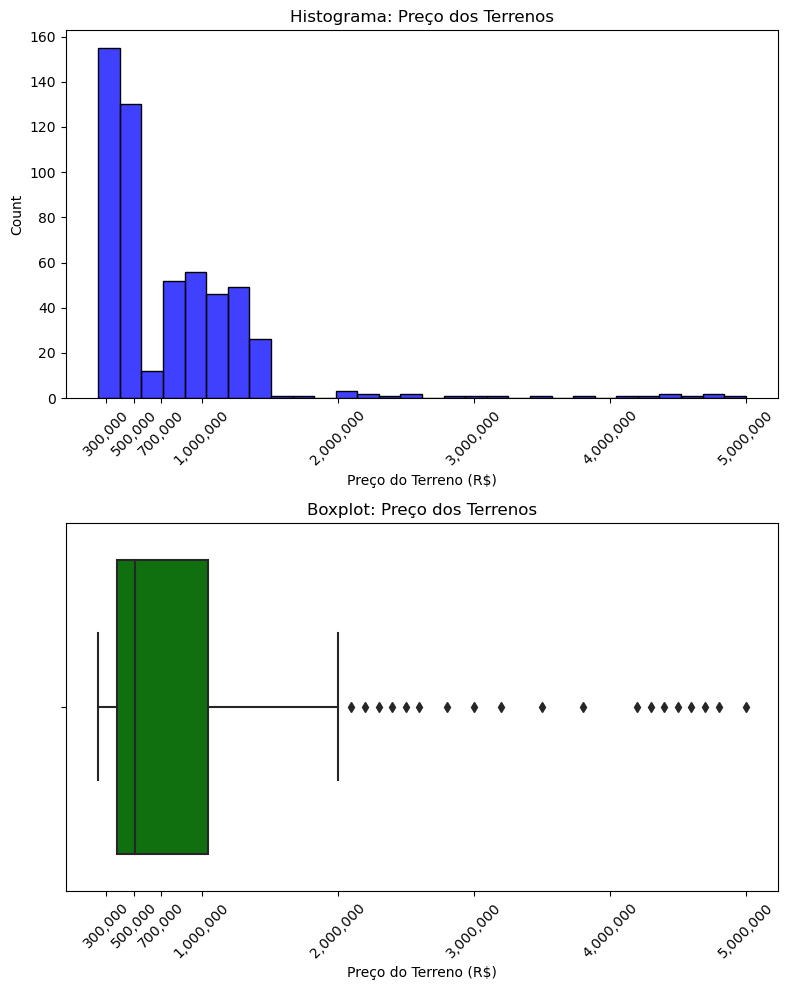

In [6]:
# Configurando o tamanho da figura
plt.figure(figsize=(8, 10))

# Plotando o histograma do preço dos terrenos
plt.subplot(2, 1, 1)  # 2 linhas, 1 coluna, primeiro gráfico
sns.histplot(data['Preço do Terreno (R$)'], bins=30, color='blue', kde=False)  # Aumentando o número de bins
plt.title('Histograma: Preço dos Terrenos')
plt.xlabel('Preço do Terreno (R$)')

# Ajustando os ticks do eixo X para exibir números específicos, como 300 mil, 500 mil, 1 milhão, até 5 milhões
plt.xticks([300000, 500000, 700000, 1000000, 2000000, 3000000, 4000000, 5000000], 
           labels=['300 mil', '500 mil', '700 mil', '1 milhão', '2 milhões', '3 milhões', '4 milhões', '5 milhões'], rotation=45)

# Formatando o eixo X para mostrar as casas decimais e evitar notação científica
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Mostra sem casas decimais, mas com separadores de milhar

# Plotando o boxplot do preço dos terrenos
plt.subplot(2, 1, 2)  # 2 linhas, 1 coluna, segundo gráfico
sns.boxplot(x=data['Preço do Terreno (R$)'], color='green', linewidth=1.5)  # Boxplot sem preenchimento
plt.title('Boxplot: Preço dos Terrenos')

# Ajustando os ticks do eixo X no boxplot para mostrar os mesmos valores
plt.xticks([300000, 500000, 700000, 1000000, 2000000, 3000000, 4000000, 5000000], 
           labels=['300 mil', '500 mil', '700 mil', '1 milhão', '2 milhões', '3 milhões', '4 milhões', '5 milhões'], rotation=45)

# Formatando o eixo X para mostrar as casas decimais e evitar notação científica
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Mostra sem casas decimais, mas com separadores de milhar

# Ajustando o layout
plt.tight_layout()
plt.show()



In [7]:
### Análise dos terrenos

# Passo 3: Análise e Pontuação dos Terrenos
# Supondo que o preço do terreno seja o critério mais importante, vamos normalizá-lo e atribuir pesos aos outros critérios
peso_preco_terreno = 0.5
peso_log_pessoas = 0.2
peso_log_veiculos = 0.2
peso_tipo_solo = 0.1

# Normalização do preço do terreno
data['Preço do Terreno (Normalizado)'] = (data['Preço do Terreno (R$)'] - 
                                          data['Preço do Terreno (R$)'].min()) / (
                                         data['Preço do Terreno (R$)'].max() - 
                                         data['Preço do Terreno (R$)'].min())

# Cálculo da pontuação para cada terreno
data['Pontuação'] = 0

# Pontuação baseada no preço do terreno (considerando normalização)
data['Pontuação'] += peso_preco_terreno * ((data['Preço do Terreno (R$)'] - data['Preço do Terreno (R$)'].min()) /
                                           (data['Preço do Terreno (R$)'].max() - data['Preço do Terreno (R$)'].min()))

# Pontuação extra se a logística de pessoas é alta
data['Pontuação'] += peso_log_pessoas * data['Logística de Pessoas'].apply(lambda x: 1 if x == 'Alta' else 0)

# Pontuação extra se a logística de veículos é alta
data['Pontuação'] += peso_log_veiculos * data['Logística de Veículos'].apply(lambda x: 1 if x == 'Alta' else 0)

# Pontuação extra se o tipo de solo é arenoso
data['Pontuação'] += peso_tipo_solo * data['Tipo de Solo'].apply(lambda x: 1 if x == 'Arenoso' else 0)


In [8]:
# Passo 4: Seleção do Melhor Terreno
melhor_terreno = data.iloc[data['Pontuação'].idxmax()]
# Ordenar os terrenos pela pontuação em ordem decrescente
top_terrenos = data.sort_values(by='Pontuação', ascending=False)

# Selecionar os top 3 terrenos
top3_terrenos = top_terrenos.head(3)

# Exibir os top 3 terrenos de forma mais legível
print("Top 3 Terrenos:")
for i, terreno in top3_terrenos.iterrows():
    print(f"Terreno {i + 1}:")
    print(f"Bairro: {terreno['Bairro']}")
    print(f"Preço do Terreno (R$): {terreno['Preço do Terreno (R$)']}")
    print(f"Preço do Metro Quadrado (R$/m²): {terreno['Preço do Metro Quadrado (R$/m²)']}")
    print(f"CEP: {terreno['CEP']}")
    print(f"De Frente para Praia: {'Sim' if terreno['De Frente para Praia'] else 'Não'}")
    print(f"Logística de Pessoas: {terreno['Logística de Pessoas']}")
    print(f"Logística de Veículos: {terreno['Logística de Veículos']}")
    print(f"Tipo de Solo: {terreno['Tipo de Solo']}\n")
# Exibir o top 1 terreno
print("Top 1 Terreno:")
print(melhor_terreno)




Top 3 Terrenos:
Terreno 529:
Bairro: Vargem Grande
Preço do Terreno (R$): 4300000
Preço do Metro Quadrado (R$/m²): 21500
CEP: 22785-030
De Frente para Praia: Sim
Logística de Pessoas: Alta
Logística de Veículos: Alta
Tipo de Solo: Arenoso

Terreno 525:
Bairro: Flamengo
Preço do Terreno (R$): 4200000
Preço do Metro Quadrado (R$/m²): 21000
CEP: 22210-030
De Frente para Praia: Sim
Logística de Pessoas: Alta
Logística de Veículos: Alta
Tipo de Solo: Arenoso

Terreno 522:
Bairro: Ipanema
Preço do Terreno (R$): 5000000
Preço do Metro Quadrado (R$/m²): 25000
CEP: 22420-040
De Frente para Praia: Sim
Logística de Pessoas: Alta
Logística de Veículos: Alta
Tipo de Solo: Argiloso

Top 1 Terreno:
Preço do Terreno (R$)                  340000
Preço do Metro Quadrado (R$/m²)          1700
Bairro                             Cavalcanti
CEP                                 21381-341
De Frente para Praia                      Não
Logística de Pessoas                    Média
Logística de Veículos          

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Taxa base de valorização
taxa_base = 0.0142  # 1,42% ao ano

# Selecionar o melhor terreno (supõe que os terrenos já estejam ordenados por algum critério)
melhor_terreno = top3_terrenos.iloc[0].copy()  # Seleciona o primeiro terreno

# Taxa total de valorização (apenas a taxa base)
taxa_total_valorizacao = taxa_base

# Preço inicial do terreno
preco_inicial = melhor_terreno['Preço do Terreno (R$)']

# Gerar dados de preço do terreno ao longo do tempo com base na taxa de valorização
anos = np.array([0, 1, 5, 10, 20]).reshape(-1, 1)
preco_terreno = preco_inicial * (1 + taxa_total_valorizacao) ** anos.flatten()

# Treinar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(anos, preco_terreno.reshape(-1, 1))

# Prever os valores futuros
previsao_anos = np.array([1, 5, 10, 20]).reshape(-1, 1)
previsao_valorizacao = modelo.predict(previsao_anos)

# Calcular as porcentagens de valorização
porcentagens = ((previsao_valorizacao.flatten() - preco_inicial) / preco_inicial) * 100

# Exibir as projeções no formato solicitado
print(f"Projeção de Valorização do Melhor Terreno ({melhor_terreno['Bairro']}):")
for ano, preco, porcentagem in zip([1, 5, 10, 20], previsao_valorizacao, porcentagens):
    print(f"Em {ano} ano(s): R${preco[0]:,.2f} (+{porcentagem:.2f}%)")



Projeção de Valorização do Melhor Terreno (Vargem Grande):
Em 1 ano(s): R$4,351,229.27 (+1.19%)
Em 5 ano(s): R$4,631,358.69 (+7.71%)
Em 10 ano(s): R$4,981,520.46 (+15.85%)
Em 20 ano(s): R$5,681,844.01 (+32.14%)


In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Taxa base de valorização
taxa_base = 0.0142  # 1,42% ao ano

# Definir zonas e os bairros que pertencem a cada uma delas
zonas_bairros = {
    'Zona Central': ['Centro', 'Glória', 'Catete', 'Lapa', 'Santa Teresa', 'Flamengo'],
    'Zona Norte': ['Tijuca', 'Maracanã', 'Grajaú', 'Madureira', 'Vila Isabel', 'Bonsucesso', 'Bangu', 'Rocha Miranda', 'Cascadura', 'Pavuna', 'Inhaúma', 'Guadalupe', 'Parada de Lucas', 'Anchieta', 'Realengo', 'Piedade', 'Praça Seca', 'Senador Camará', 'Cosmos', 'Riachuelo', 'Ricardo de Albuquerque', 'Complexo do Alemão', 'Cavalcanti', 'Coelho Neto', 'Jardim Sulacap', 'Cordovil', 'Acari', 'Campo dos Afonsos', 'Vigário Geral', 'Guaratiba', 'Colégio', 'Santo Cristo', 'Vaz Lobo', 'Tomás Coelho', 'Rocha', 'Complexo do Lins', 'Sepetiba', 'Padre Miguel', 'Sampaio', 'Penha Circular', 'São Cristóvão', 'Jardim Oceânico'],
    'Zona Sul': ['Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Barra da Tijuca', 'Gávea', 'Laranjeiras', 'Leme', 'Jardim Botânico', 'Humaitá'],
    'Zona Oeste': ['Recreio dos Bandeirantes', 'Vargem Grande', 'Vargem Pequena', 'Jacaré', 'Taquara', 'Engenheiro Leal', 'Pedra de Guaratiba', 'Parque Anchieta', 'Cidade de Deus']
}

# Função para identificar a zona de um bairro e retornar a taxa adicional de valorização
def definir_taxa_adicional(bairro):
    if bairro in zonas_bairros['Zona Central']:
        return 0.005  # 0,5% adicional
    elif bairro in zonas_bairros['Zona Norte']:
        return -0.002  # -0,2% (redução)
    elif bairro in zonas_bairros['Zona Sul']:
        return 0.008  # 0,8% adicional
    elif bairro in zonas_bairros['Zona Oeste']:
        return 0.006  # 0,6% adicional para a Zona Oeste
    else:
        return 0  # Se o bairro não estiver listado, retorna 0%

# Adicionar coluna de taxa total de valorização ao DataFrame
top3_terrenos = top3_terrenos.copy()  # Garantir que é uma cópia
top3_terrenos['Taxa de Valorizacao'] = top3_terrenos['Bairro'].apply(definir_taxa_adicional) + taxa_base

# Loop para calcular e exibir a valorização usando regressão linear
print("Projeção de Valorização dos 3 Melhores Terrenos (Taxa Base + Taxa por Bairro):")

# Criar uma lista para armazenar a pontuação de valorização dos terrenos
pontuacoes_terrenos = []

for i, terreno in top3_terrenos.iterrows():
    preco_inicial = terreno['Preço do Terreno (R$)']
    taxa_1_ano = terreno['Taxa de Valorizacao']  # Usar a taxa total (base + adicional)

    # Gerar dados de preço do terreno ao longo do tempo com base na taxa de valorização
    anos = np.array([0, 1, 5, 10, 20]).reshape(-1, 1)
    preco_terreno = preco_inicial * (1 + taxa_1_ano) ** anos.flatten()

    # Treinar o modelo de regressão linear
    modelo = LinearRegression()
    modelo.fit(anos, preco_terreno.reshape(-1, 1))

    # Prever os valores futuros
    previsao_anos = np.array([1, 5, 10, 20]).reshape(-1, 1)
    previsao_valorizacao = modelo.predict(previsao_anos)

    # Calcular as porcentagens de valorização
    porcentagens = ((previsao_valorizacao.flatten() - preco_inicial) / preco_inicial) * 100

    # Calcular a pontuação do terreno (média da porcentagem de valorização nos anos previstos)
    pontuacao = np.mean(porcentagens)

    # Adicionar a pontuação do terreno e o nome do bairro na lista
    pontuacoes_terrenos.append((terreno['Bairro'], pontuacao))

    # Exibir as projeções no formato solicitado
    print(f"Terreno {i + 1} ({terreno['Bairro']}):")
    for ano, preco, porcentagem in zip([1, 5, 10, 20], previsao_valorizacao, porcentagens):
        print(f"Em {ano} ano(s): R${preco[0]:,.2f} (+{porcentagem:.2f}%)")
    print()  # Linha em branco entre terrenos

# Ordenar os terrenos pela pontuação (maior pontuação primeiro)
pontuacoes_terrenos.sort(key=lambda x: x[1], reverse=True)

# Exibir as pontuações
print("Ranking dos Terrenos por Pontuação de Valorização:")
for i, (bairro, pontuacao) in enumerate(pontuacoes_terrenos):
    print(f"{i + 1}. Bairro: {bairro} - Pontuação de Valorização: {pontuacao:.2f}%")


Projeção de Valorização dos 3 Melhores Terrenos (Taxa Base + Taxa por Bairro):
Terreno 529 (Vargem Grande):
Em 1 ano(s): R$4,365,818.75 (+1.53%)
Em 5 ano(s): R$4,788,607.21 (+11.36%)
Em 10 ano(s): R$5,317,092.78 (+23.65%)
Em 20 ano(s): R$6,374,063.93 (+48.23%)

Terreno 525 (Flamengo):
Em 1 ano(s): R$4,262,245.45 (+1.48%)
Em 5 ano(s): R$4,650,886.23 (+10.74%)
Em 10 ano(s): R$5,136,687.20 (+22.30%)
Em 20 ano(s): R$6,108,289.13 (+45.44%)

Terreno 522 (Ipanema):
Em 1 ano(s): R$5,080,890.33 (+1.62%)
Em 5 ano(s): R$5,632,031.93 (+12.64%)
Em 10 ano(s): R$6,320,958.92 (+26.42%)
Em 20 ano(s): R$7,698,812.91 (+53.98%)

Ranking dos Terrenos por Pontuação de Valorização:
1. Bairro: Ipanema - Pontuação de Valorização: 23.66%
2. Bairro: Vargem Grande - Pontuação de Valorização: 21.20%
3. Bairro: Flamengo - Pontuação de Valorização: 19.99%


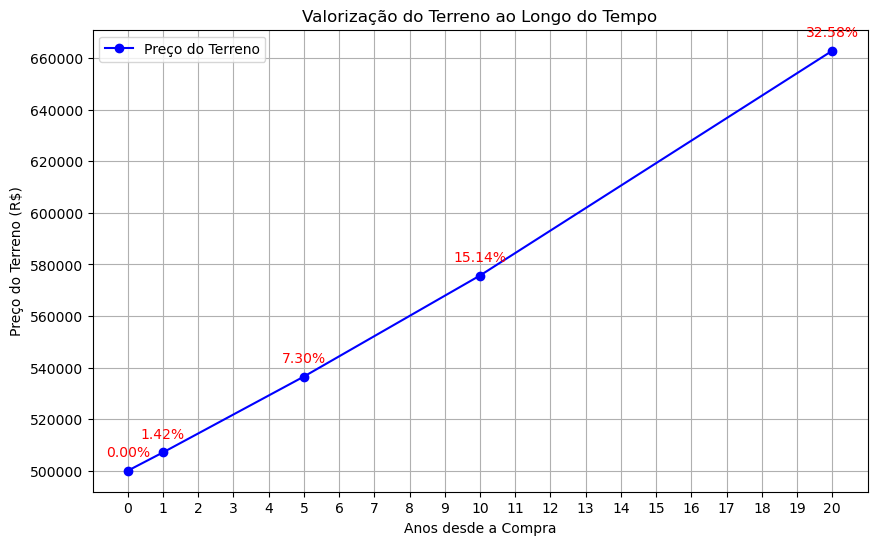

In [11]:
# Passo 6: Plotando o gráfico

# Supondo que o preço inicial do terreno e a taxa de valorização estejam definidos
preco_inicial = 500000  # Exemplo de preço inicial do terreno (R$)
taxa_valorizacao = 0.0142  # Taxa de valorização anual de 1,42%

# Definir os anos para o gráfico
anos = np.array([0, 1, 5, 10, 20])

# Calcular o preço do terreno ao longo dos anos (valorização)
preco_terreno = preco_inicial * (1 + taxa_valorizacao) ** anos

# Calcular as porcentagens de valorização para cada ano
porcentagens = ((preco_terreno - preco_inicial) / preco_inicial) * 100

# Plotando o gráfico de valorização
plt.figure(figsize=(10, 6))
plt.plot(anos, preco_terreno, marker='o', linestyle='-', color='b', label='Preço do Terreno')

# Adicionando as porcentagens de valorização ao gráfico
for i, txt in enumerate(porcentagens):
    plt.annotate(f'{txt:.2f}%', (anos[i], preco_terreno[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='red')

# Título e rótulos
plt.title('Valorização do Terreno ao Longo do Tempo')
plt.xlabel('Anos desde a Compra')
plt.ylabel('Preço do Terreno (R$)')

# Ajustando o eixo X para incluir 20 anos
plt.xticks(np.arange(0, 21, step=1))

# Exibindo a grade e a legenda
plt.grid(True)
plt.legend()

# Exibindo o gráfico
plt.show()

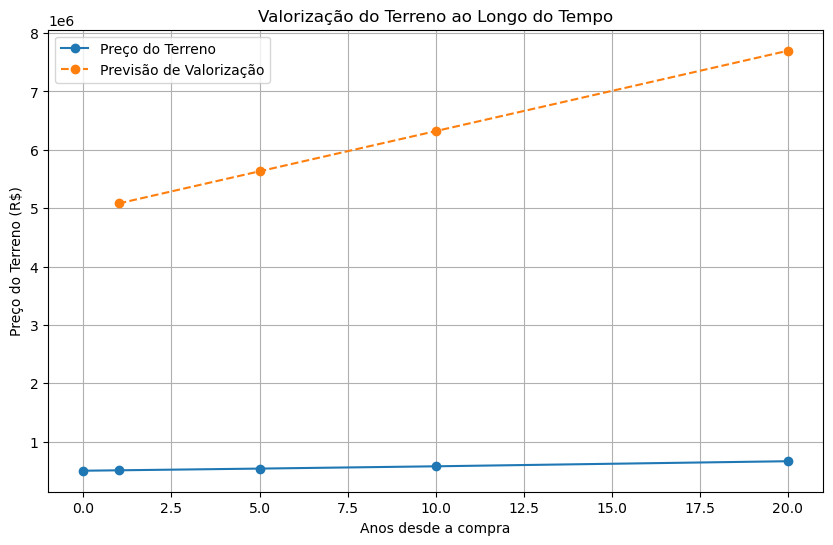

In [12]:
# Passo 6: Visualização dos Resultados
# Gráfico de valorização do terreno ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(anos, preco_terreno, 'o-', label='Preço do Terreno')
plt.plot(previsao_anos, previsao_valorizacao, 'o--', label='Previsão de Valorização')
plt.title('Valorização do Terreno ao Longo do Tempo')
plt.xlabel('Anos desde a compra')
plt.ylabel('Preço do Terreno (R$)')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Passo 7 Visualizando a localização

from geopy.geocoders import Nominatim

# Lista de CEPs para consultar
ceps = ['22240-000', '22785-030', '22210-030']

# Criar uma instância do geolocalizador Nominatim
geolocator = Nominatim(user_agent="geolocalização")

# Lista para armazenar as coordenadas
coordenadas_top3 = []

# Iterar sobre os CEPs e obter as coordenadas
for cep in ceps:
    # Consultar as coordenadas usando o CEP
    location = geolocator.geocode(cep, addressdetails=True)
    
    # Verificar se a localização foi encontrada
    if location:
        # Obter as coordenadas (latitude e longitude)
        latitude = location.latitude
        longitude = location.longitude
        
        # Adicionar as coordenadas à lista
        coordenadas_top3.append((latitude, longitude))

# Exibir as coordenadas
for i, (lat, lon) in enumerate(coordenadas_top3, start=1):
    print(f"Terreno {i}: Latitude {lat}, Longitude {lon}")

Terreno 1: Latitude -22.93289595, Longitude -43.18268503333333
Terreno 2: Latitude 48.5018486, Longitude 9.0498594
Terreno 3: Latitude -22.929916796, Longitude -43.174019656


In [14]:
# Criar um mapa centrado em uma localização inicial
import folium
mapa = folium.Map(location=[-22.9035, -43.2096], zoom_start=10)

# Adicionar marcadores para cada localização
for i, (lat, lon) in enumerate(coordenadas_top3, start=1):
    if i == 2:
        folium.Marker([lat, lon], popup=f"Terreno {i} - Localização Incorreta", icon=folium.Icon(color='red')).add_to(mapa)
    else:
        folium.Marker([lat, lon], popup=f"Terreno {i}").add_to(mapa)

# Exibir o mapa
mapa


In [15]:
jupyter nbconvert --to pdf nome_do_arquivo.ipynb


SyntaxError: invalid syntax (2107278317.py, line 1)